In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy.stats import zscore
import scipy
from scipy.stats import shapiro,chi2,normaltest,kstest

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB 

from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")


In [2]:
pip install --user joblib

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
df= pd.read_csv(r"D:\ABhay Python\fraudulent_transactions.csv ")

df

,Transaction_ID,Transaction_Amount,Transaction_Type,Customer_Age,Time_of_Transaction,Location,Previous_Fraudulent_Activity,Account_Balance,Fraud
0,1,1875.83,ATM,69,23,Rural,1,47715.42,0
1,2,4753.82,Bank Transfer,21,14,Urban,1,29946.08,0
2,3,3661.31,ATM,51,13,Suburban,1,37742.30,0
3,4,2995.30,Bank Transfer,22,21,Urban,1,35719.05,0
4,5,784.31,Bank Transfer,50,13,Suburban,0,43697.10,0
...,...,...,...,...,...,...,...,...,...
4995,4996,4487.50,Online,59,5,Urban,0,15365.36,0
4996,4997,601.31,Bank Transfer,33,0,Suburban,1,15813.54,0
4997,4998,1642.57,Online,42,11,Suburban,0,43510.55,0
4998,4999,4079.65,Bank Transfer,77,12,Suburban,0,28004.22,0


In [5]:
df.isnull().sum()

Transaction_ID                  0
Transaction_Amount              0
Transaction_Type                0
Customer_Age                    0
Time_of_Transaction             0
Location                        0
Previous_Fraudulent_Activity    0
Account_Balance                 0
Fraud                           0
dtype: int64

In [6]:
print(f"DATA TYPE \n{df.dtypes}")
print("*"*100)
print(f"shape of data \n{df.shape}")
print("*"*100)
print(f"DATA DESc \n{df.describe()}")
print("*"*100)
print(f"DATA info \n{df.info}")
print("*"*100)
print(f"DATA  \n{df.isnull()}")
print("*"*100)
print(f"/n DATA TYPE \n{df.isnull().sum()}")
print("*"*100)
print(f"DUPLICATE  \n{df.duplicated()}")
print(f" total DUPLICATE  \n {df.duplicated().sum()}")
print("*"*100)

DATA TYPE 
Transaction_ID                    int64
Transaction_Amount              float64
Transaction_Type                 object
Customer_Age                      int64
Time_of_Transaction               int64
Location                         object
Previous_Fraudulent_Activity      int64
Account_Balance                 float64
Fraud                             int64
dtype: object
****************************************************************************************************
shape of data 
(5000, 9)
****************************************************************************************************
DATA DESc 
       Transaction_ID  Transaction_Amount  Customer_Age  Time_of_Transaction  \
count     5000.000000         5000.000000    5000.00000          5000.000000   
mean      2500.500000         2486.675806      48.42500            11.742200   
std       1443.520003         1446.720045      17.94263             6.927145   
min          1.000000            5.060000      18.00000  

#### Changing Datatypes from Categorical To NumericaL

In [7]:
df.dtypes

Transaction_ID                    int64
Transaction_Amount              float64
Transaction_Type                 object
Customer_Age                      int64
Time_of_Transaction               int64
Location                         object
Previous_Fraudulent_Activity      int64
Account_Balance                 float64
Fraud                             int64
dtype: object

In [8]:
df.dtypes

Transaction_ID                    int64
Transaction_Amount              float64
Transaction_Type                 object
Customer_Age                      int64
Time_of_Transaction               int64
Location                         object
Previous_Fraudulent_Activity      int64
Account_Balance                 float64
Fraud                             int64
dtype: object

## CHECK DATA

In [9]:
def Cheching_Handling(data,col):
    mean = data[col].mean()
    median = data[col].median()
    mode=data[col].mode()
    var = data[col].var()
    std = data[col].std()
    skew = data[col].skew()

    analysis={ "median" :[median],
              "mean":[mean],
              "Var":[var],
              "Standard Deviation": [std],
              "SKEWNESS":[skew],
              "MODE":[mode],
             
             }
    
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color="lightgreen", fliersize=6, linewidth=1.5)
    plt.title(f"Boxplot of {col}", fontsize=16, weight='bold')
    plt.xlabel(col, fontsize=14)

    q1=df[col].quantile(0.25)
    q2=df[col].quantile(0.50)
    q3=df[col].quantile(0.75)
    print(f"Q1={q1}")
    print(f"Q1={q2}")
    print(f"Q1={q3}")
    print("IQR = ",q3 - q1)

    
    return pd.DataFrame(analysis)



Q1=1250.75
Q1=2500.5
Q1=3750.25
IQR =  2499.5


,median,mean,Var,Standard Deviation,SKEWNESS,MODE
0,2500.5,2500.5,2083750.0,1443.520003,0.0,0 1 1 2 2 3 3 ...


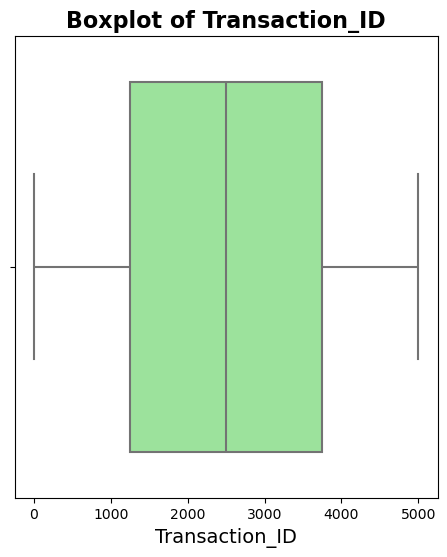

In [10]:
Cheching_Handling(df,"Transaction_ID")

## CHECKING OOUTLIERS

In [11]:
def Cheching_outliers(data,numerical_columns):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[numerical_columns], color="lightgreen", fliersize=6, linewidth=1.5)
    plt.title(f"Boxplot of {numerical_columns}", fontsize=16, weight='bold')
    plt.xlabel(numerical_columns, fontsize=14)
numerical_columns = ["Transaction_ID", "Transaction_Amount", "Customer_Age", "Time_of_Transaction", "Account_Balance"]



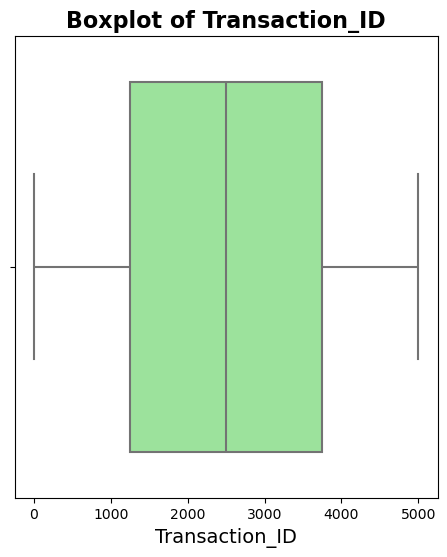

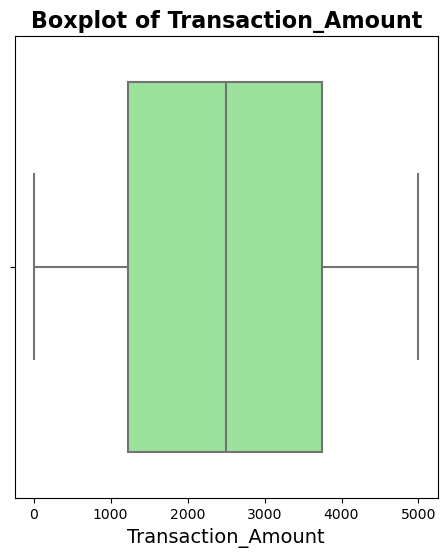

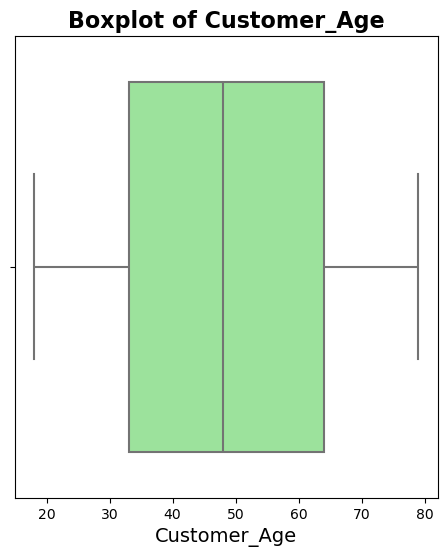

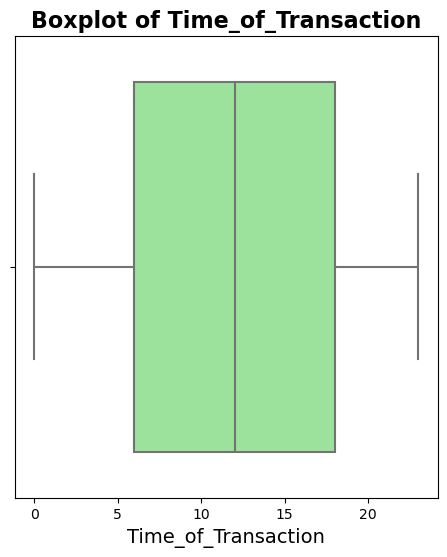

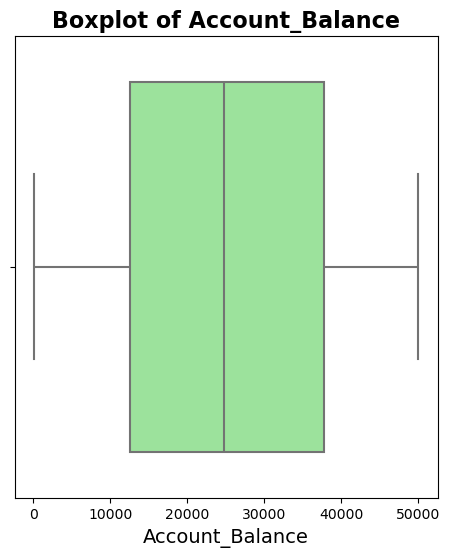

In [12]:
for i in numerical_columns :
     Cheching_outliers(df,i)


## MULTIVARIENT ANALISIS

In [13]:
def multivariate_analysis(data, numerical_columns, categorical_columns):

    # 1. Correlation Matrix
    plt.figure(figsize=(10, 8))
    corr_matrix = data[numerical_columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

    # 2. Pair Plot (Scatterplot Matrix) for Numerical Variables
    sns.pairplot(data[numerical_columns])
    plt.suptitle('Pairplot of Numerical Variables', y=1.02)
    plt.show()

    # 3. Boxplot Grouped by Categorical Variable
    for col in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[col], y=data['Transaction_ID'])  # Assuming 'Transaction_ID' is the numerical variable
        plt.title(f'Boxplot of Amount by {col}')
        plt.show()

    # 4. Violin Plot Grouped by Categorical
    for col in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.violinplot(x=data[col], y=data['Transaction_ID'])  # Again assuming 'Transaction_ID' is the numerical variable
        plt.title(f'Violin Plot of Amount by {col}')
        plt.show()

    # 5. Facet Grid for Grouped Analysis (Example: by "type" and "nameOrig")
    if 'type' in categorical_columns and 'nameOrig' in categorical_columns:
        plt.figure(figsize=(8, 6))
        g = sns.FacetGrid(data, col="type", row="nameOrig", margin_titles=True, height=5)
        g.map(sns.scatterplot, "step", "amount", alpha=0.7)
        g.set_axis_labels("Step", "Amount")
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle('Facet Grid: Step vs Amount by Type and NameOrig')
        plt.show()

    # 6. Pairwise Regression
    sns.lmplot(x='Transaction_ID', y='Fraud', data=data, hue='Location', markers="o")
    plt.title('Pairwise Regression: Amount vs Fraud (Grouped by Type)')
    plt.show()

# column cat and num
numerical_columns = ["Transaction_ID", "Transaction_Amount", "Customer_Age", "Time_of_Transaction", "Account_Balance"]
categorical_columns = ["Transaction_Type", "Location", "Previous_Fraudulent_Activity", "Fraud"]  # Assuming these are your categorical columns


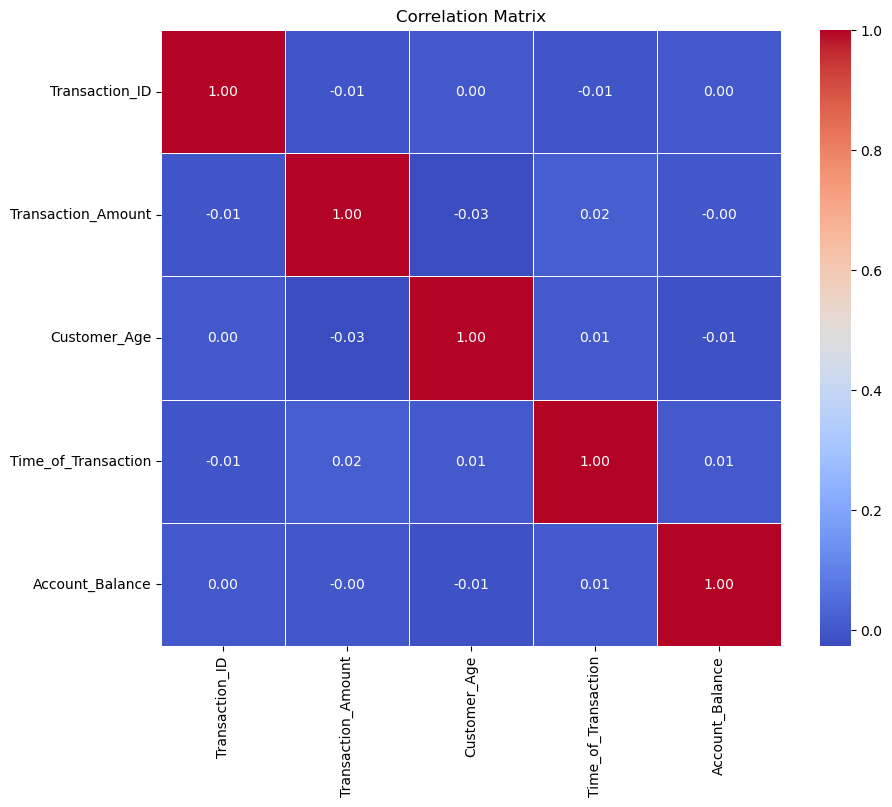

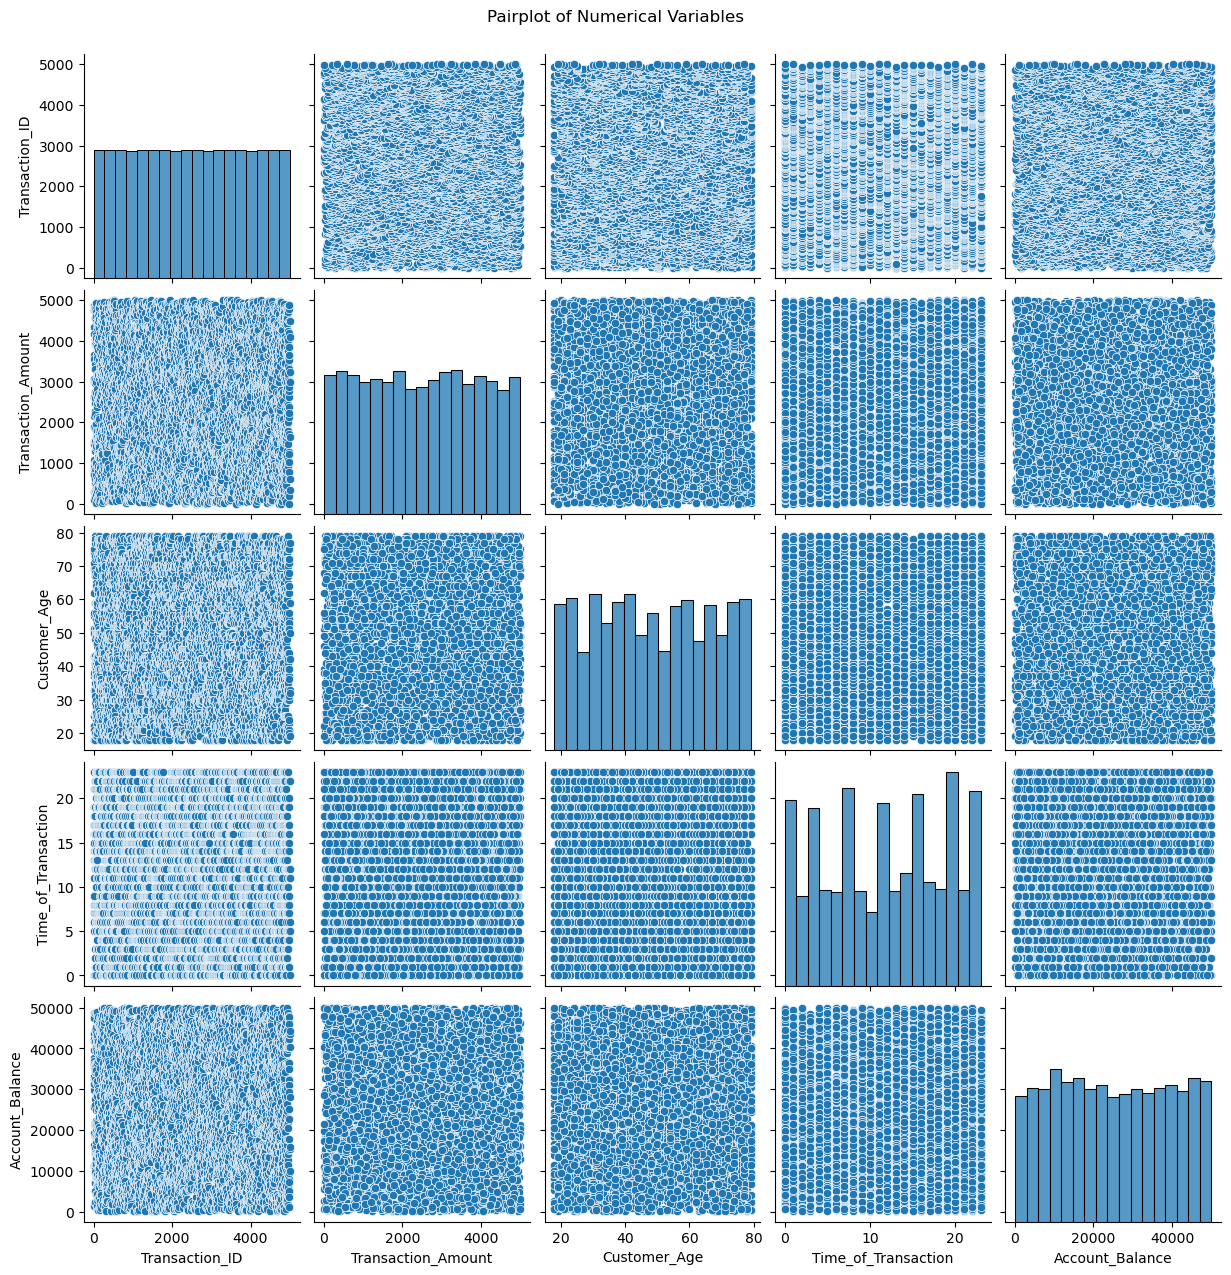

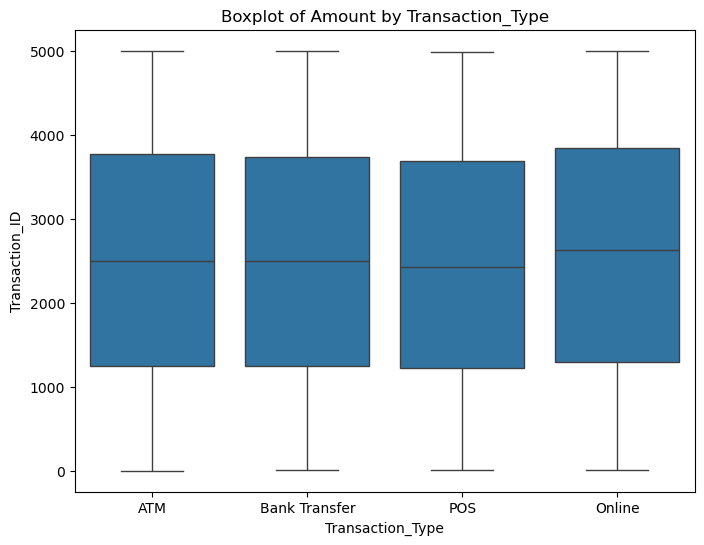

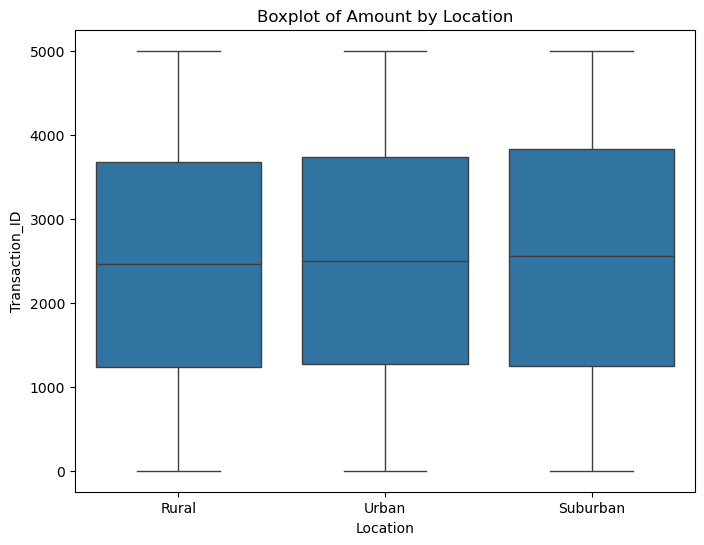

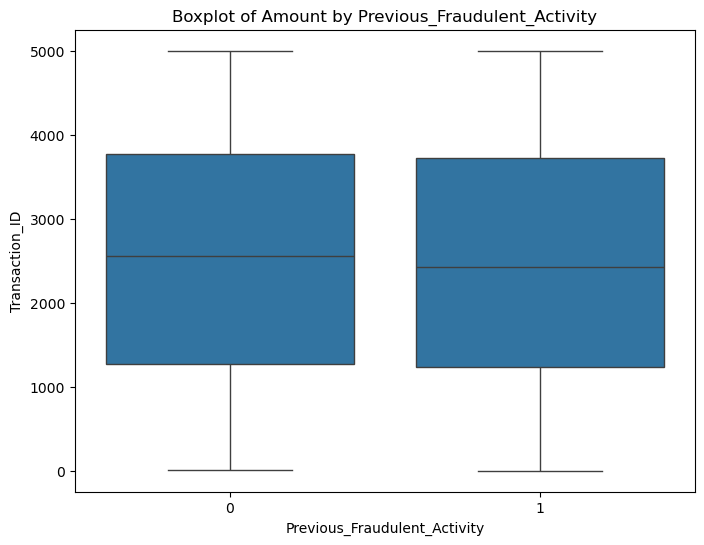

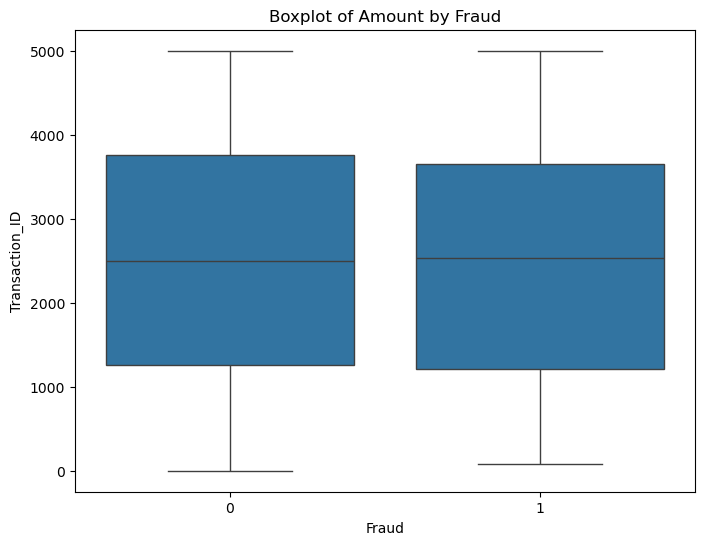

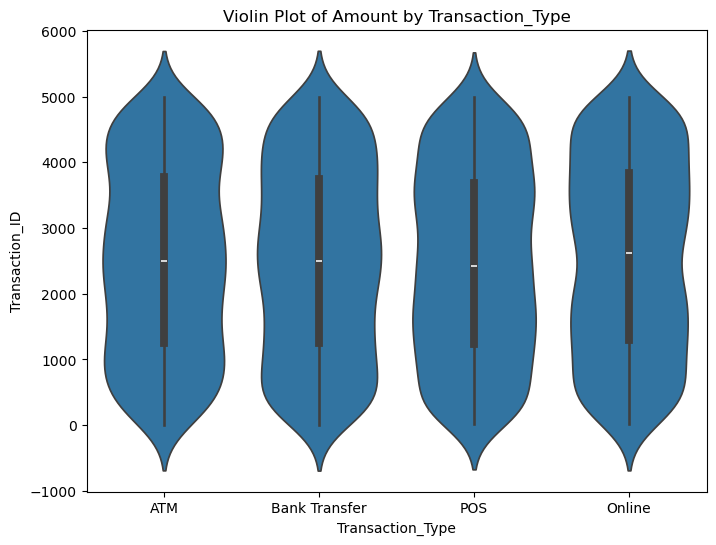

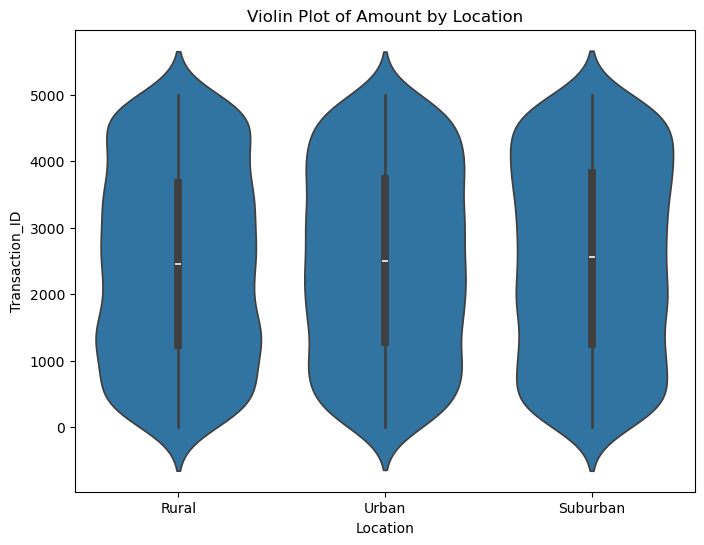

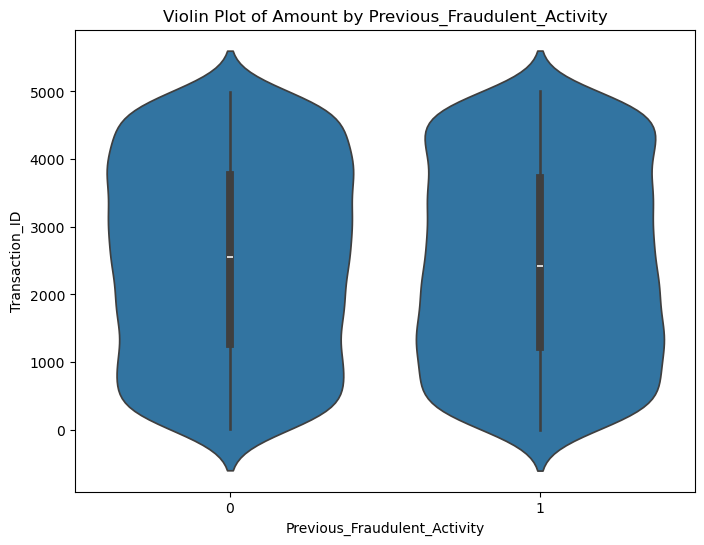

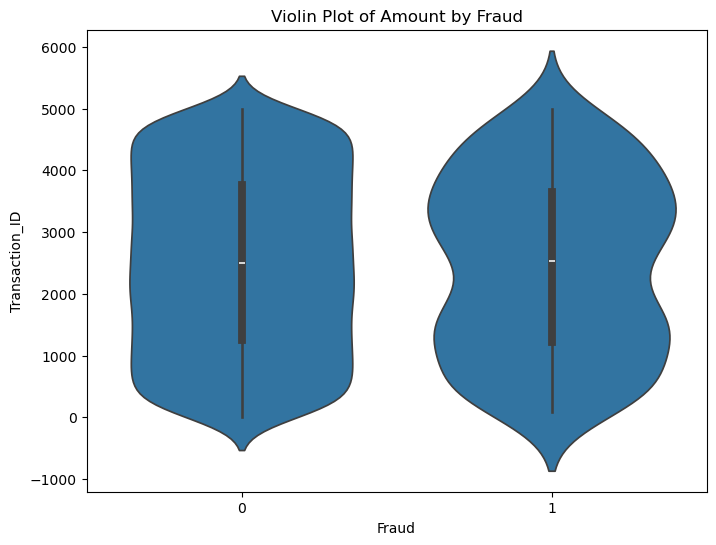

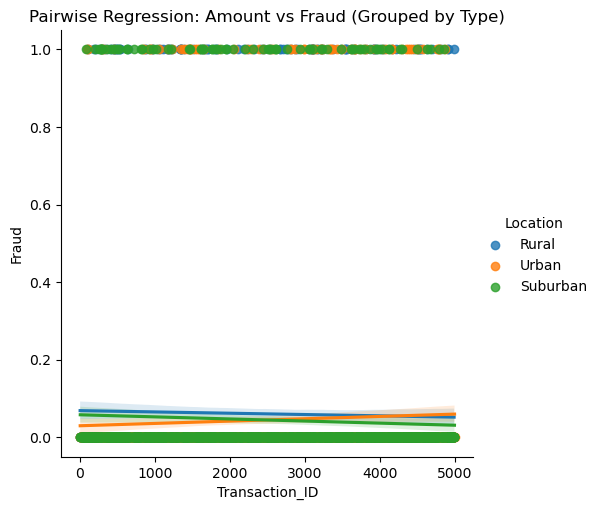

In [14]:
 multivariate_analysis(df, numerical_columns, categorical_columns)

## HANDLING OUTLIERS 

In [15]:
def Handling_Outliers(data,col):
    print(f"{col} : Outliers Checking")
    sns.boxplot(df[col], color = "c")
    plt.show()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print(f"IQR = {iqr}")
    LowerTail = q1 - 1.5 * iqr
    UpperTail = q3 + 1.5 * iqr
    print(f"Lower Tail = {LowerTail}")
    print(f"Upper Tail = {UpperTail}")
    print("******************************************************************************************************************************************************")
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    df.loc[(df[col] < LowerTail), col] = LowerTail
    df.loc[(df[col] > UpperTail), col] = UpperTail
    print("\nBoxplot After Handling of outliers:\n")
    sns.boxplot(df[col], color = "b")
    plt.show()




Transaction_ID : Outliers Checking


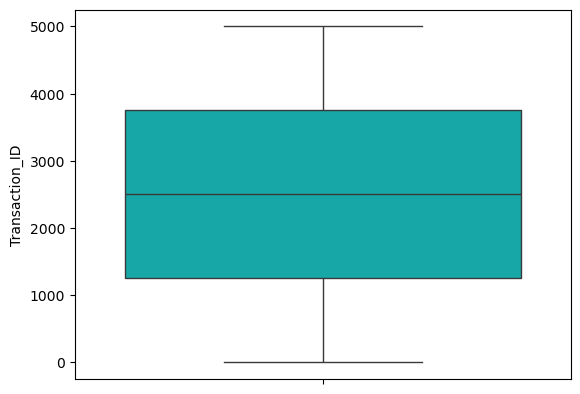

IQR = 2499.5
Lower Tail = -2498.5
Upper Tail = 7499.5
******************************************************************************************************************************************************

Boxplot After Handling of outliers:



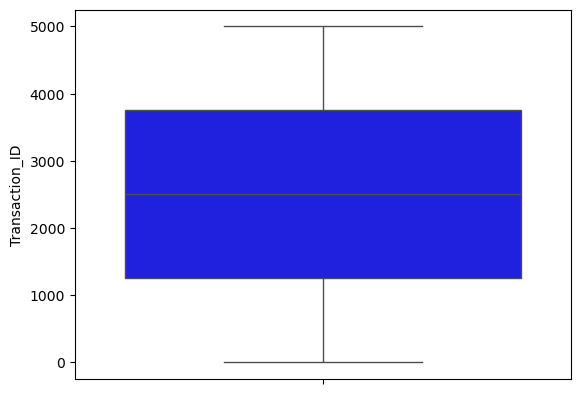

Transaction_Amount : Outliers Checking


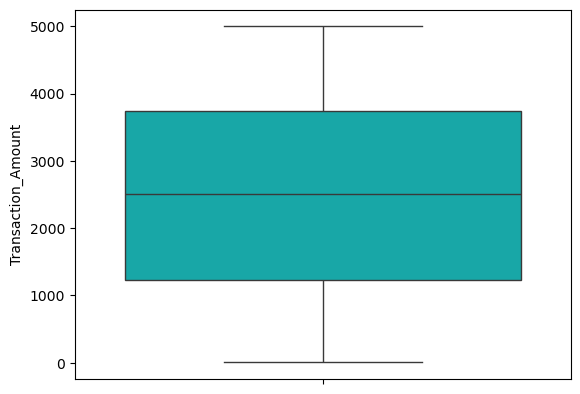

IQR = 2518.6724999999997
Lower Tail = -2554.9137499999997
Upper Tail = 7519.776249999999
******************************************************************************************************************************************************

Boxplot After Handling of outliers:



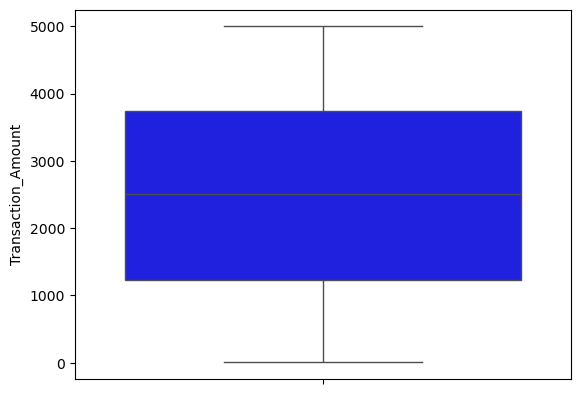

Customer_Age : Outliers Checking


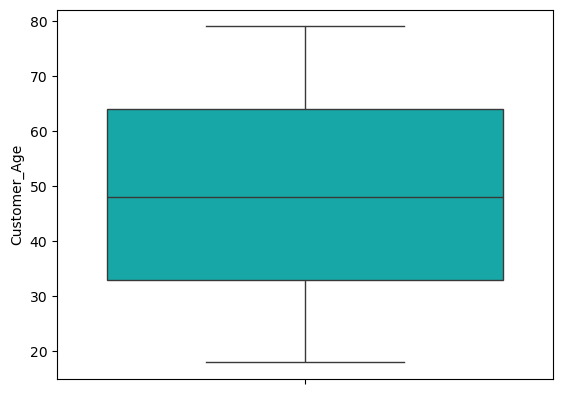

IQR = 31.0
Lower Tail = -13.5
Upper Tail = 110.5
******************************************************************************************************************************************************

Boxplot After Handling of outliers:



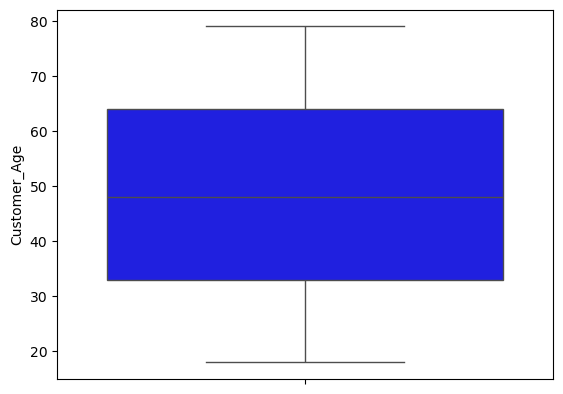

Time_of_Transaction : Outliers Checking


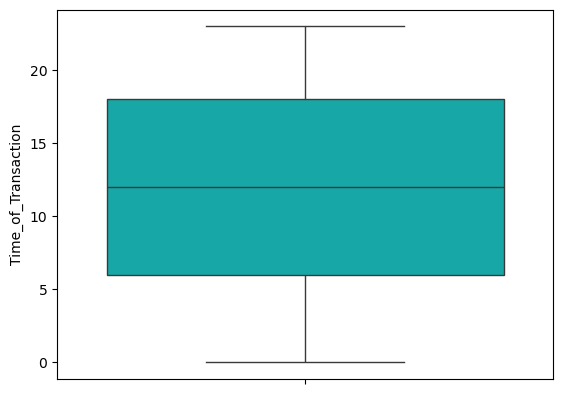

IQR = 12.0
Lower Tail = -12.0
Upper Tail = 36.0
******************************************************************************************************************************************************

Boxplot After Handling of outliers:



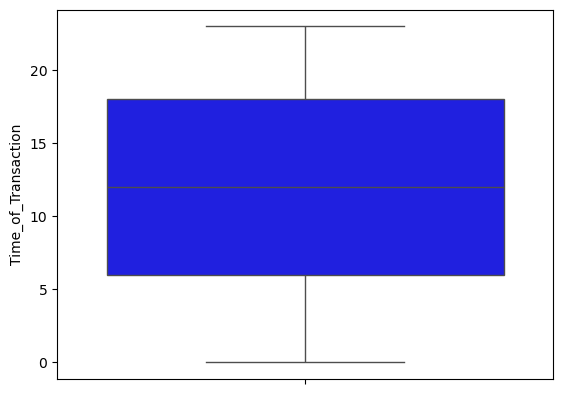

Account_Balance : Outliers Checking


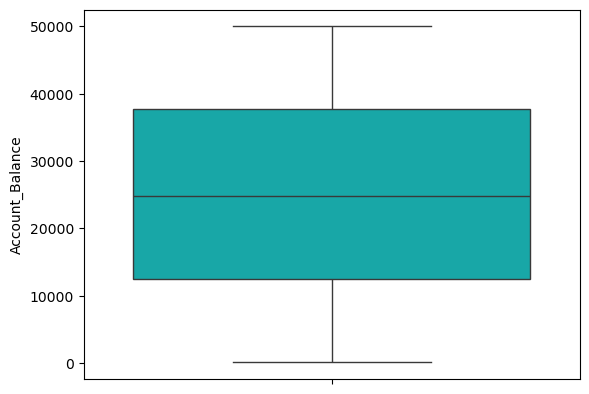

IQR = 25268.8375
Lower Tail = -25398.983750000007
Upper Tail = 75676.36625
******************************************************************************************************************************************************

Boxplot After Handling of outliers:



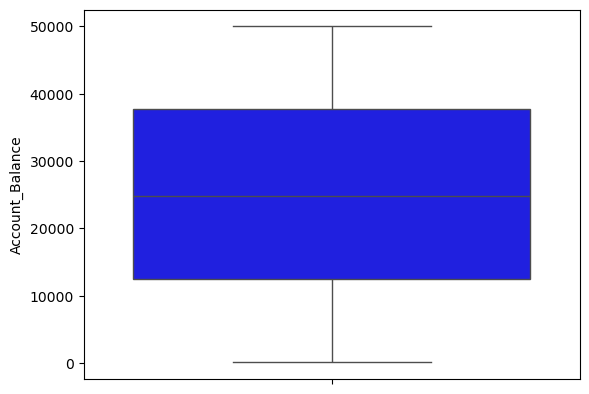

In [16]:
Handling_Outliers(df,'Transaction_ID')
Handling_Outliers(df,'Transaction_Amount')
Handling_Outliers(df,'Customer_Age')
Handling_Outliers(df,'Time_of_Transaction')
Handling_Outliers(df,'Account_Balance')



In [17]:
def univariate_visualization(data, numerical_columns, categorical_columns):

    # Set the style for seaborn (use a clean and consistent style)
    sns.set(style="whitegrid", palette="muted")
    
    # Numerical Visualizations
    for col in numerical_columns:
        plt.figure(figsize=(15, 5))

        # Histogram
        plt.subplot(1, 3, 1)
        sns.histplot(data[col], kde=True, color='skyblue', bins=30)
        plt.title(f"{col} Distribution", fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)

        # Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=data[col], color='lightgreen')
        plt.title(f"{col} Boxplot", fontsize=16)
        plt.xlabel(col, fontsize=12)

        # Density Plot (fixed color issue)
        plt.subplot(1, 3, 3)
        sns.kdeplot(data[col], shade=True, color='purple')  # Directly pass color to kdeplot
        plt.title(f"{col} Density Plot", fontsize=16)
        plt.xlabel(col, fontsize=12)

        plt.tight_layout()
        plt.show()
    
    # Categorical Visualizations
    for col in categorical_columns:
        plt.figure(figsize=(8, 6))

        # Bar Plot (Count Plot)
        sns.countplot(x=data[col], palette='Set2')
        plt.title(f"{col} Count Plot", fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.xticks(rotation=45)
        plt.show()

        # Pie Chart
        plt.figure(figsize=(6, 6))
        data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', n_colors=len(data[col].unique())))
        plt.title(f"{col} Proportions", fontsize=16)
        plt.ylabel("")  # Remove ylabel for aesthetic purposes
        plt.show()


numerical_columns = ["Transaction_ID", "Transaction_Amount", "Customer_Age", "Time_of_Transaction", "Account_Balance"]
categorical_columns = ["Transaction_Type", "Location", "Previous_Fraudulent_Activity", "Fraud"]


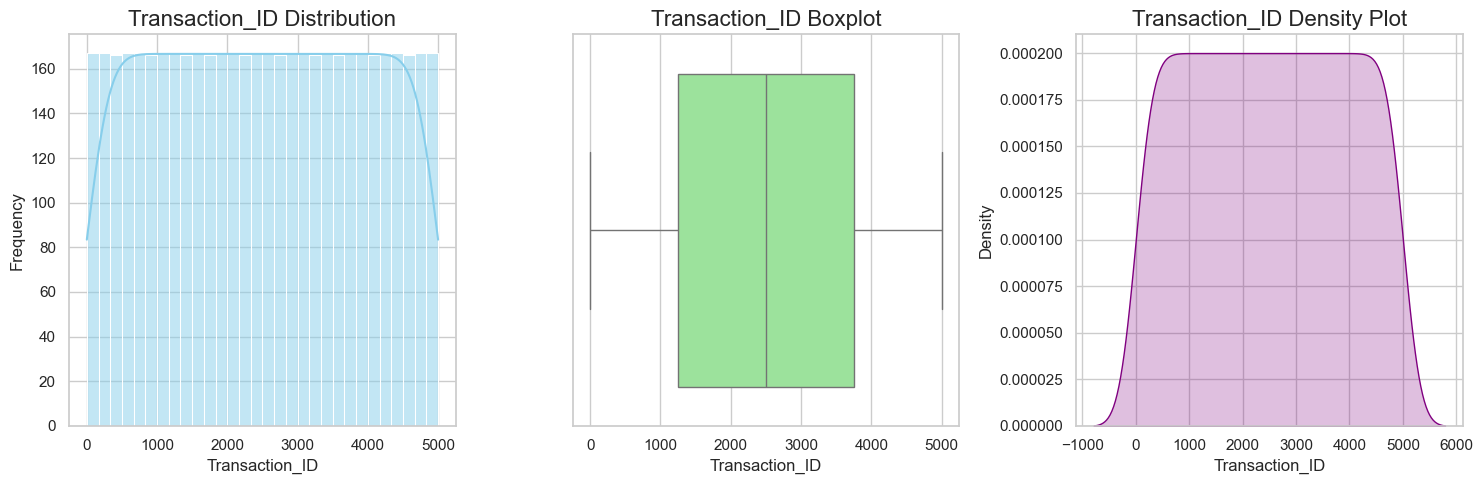

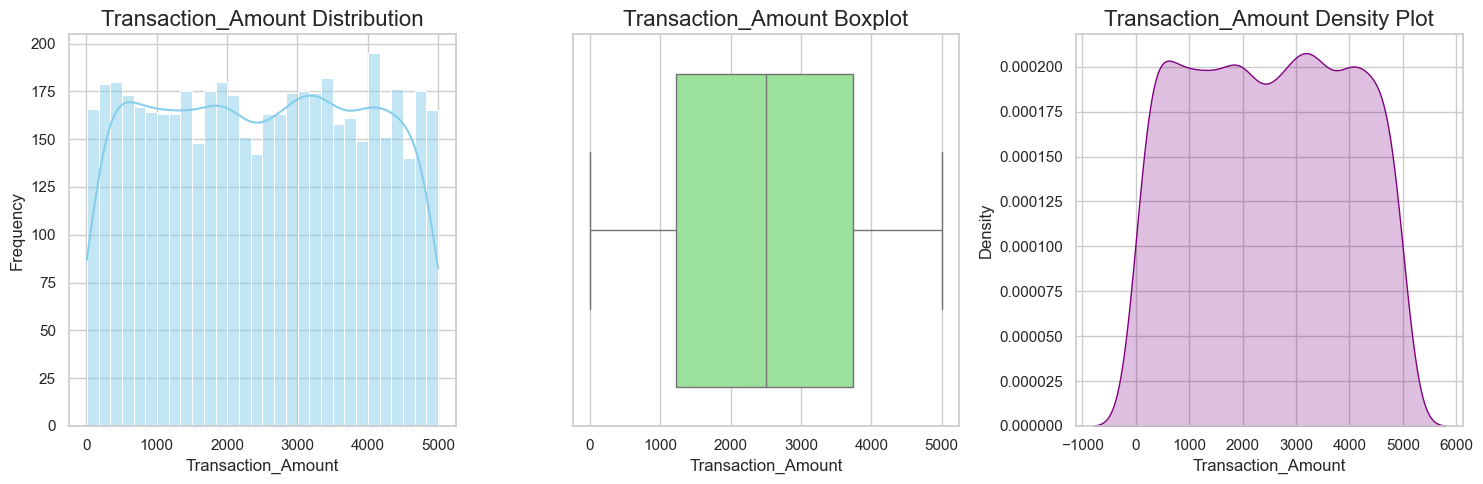

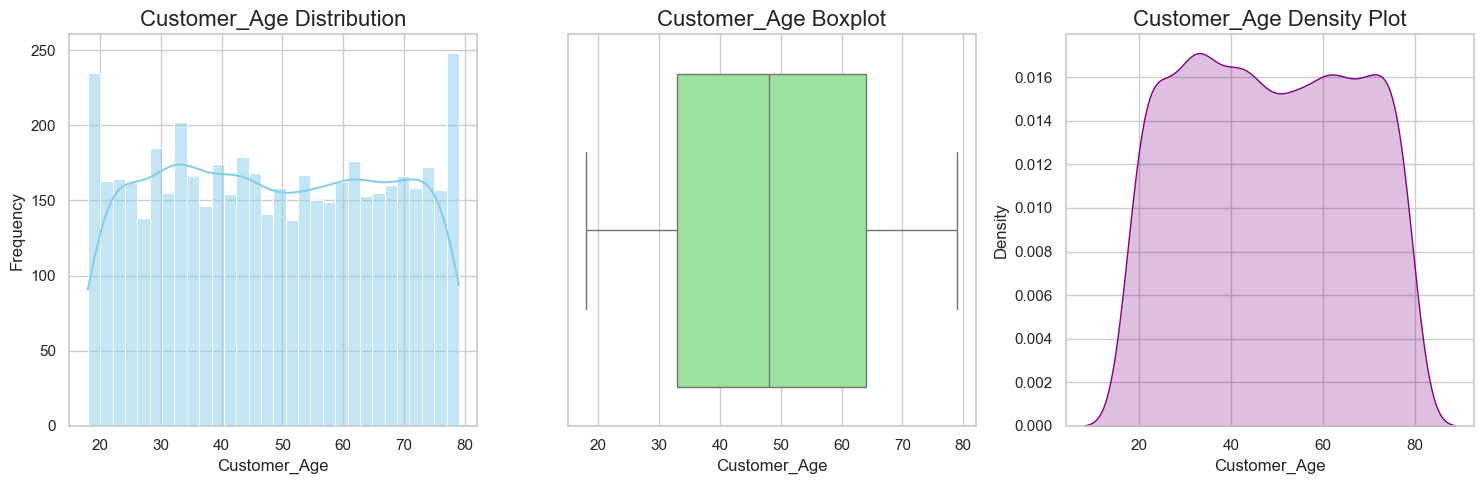

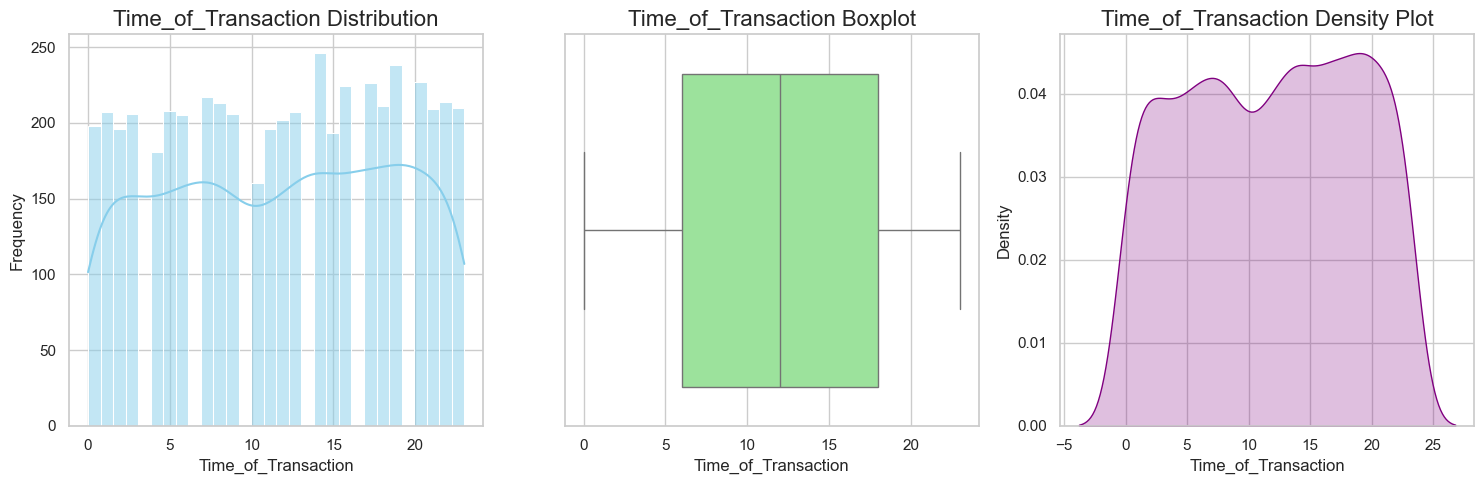

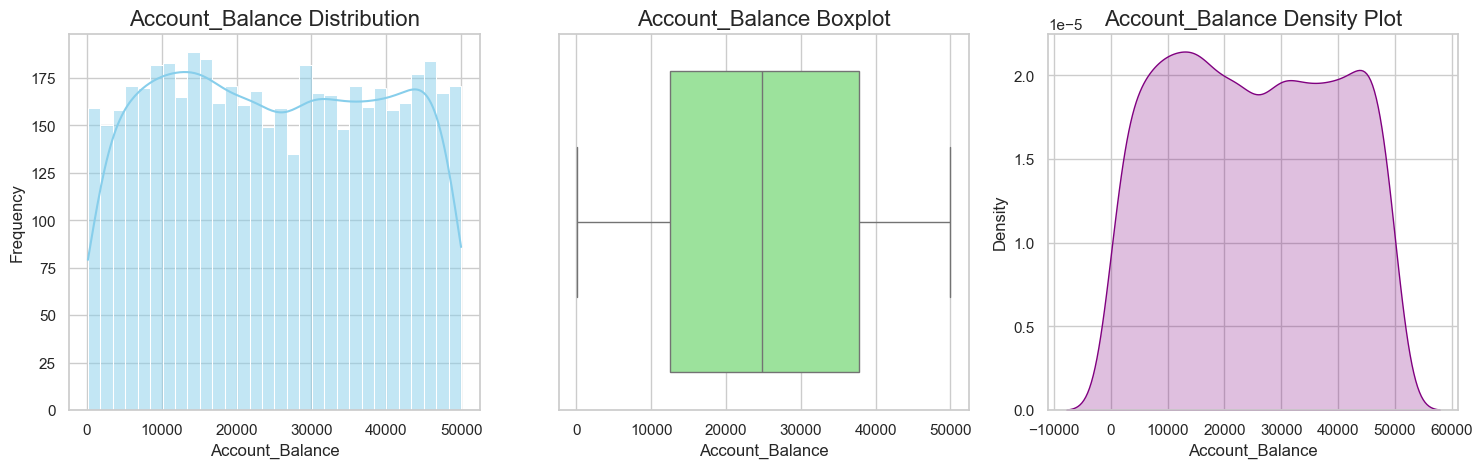

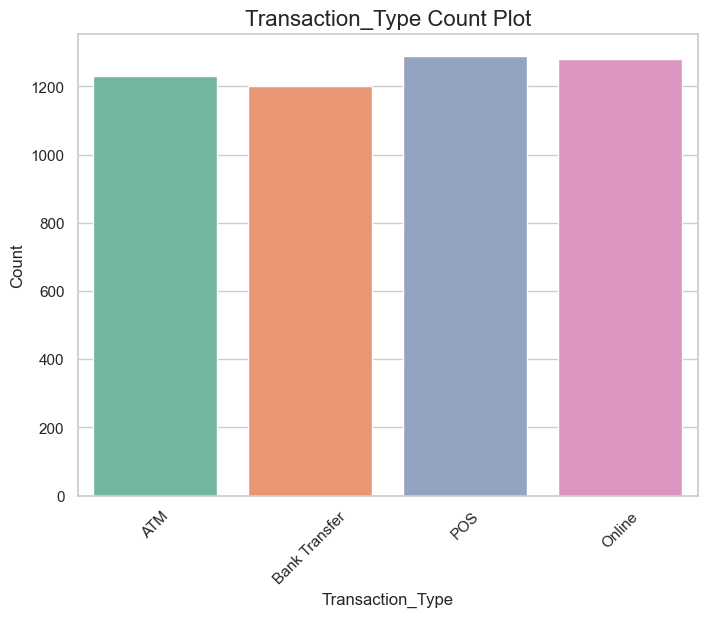

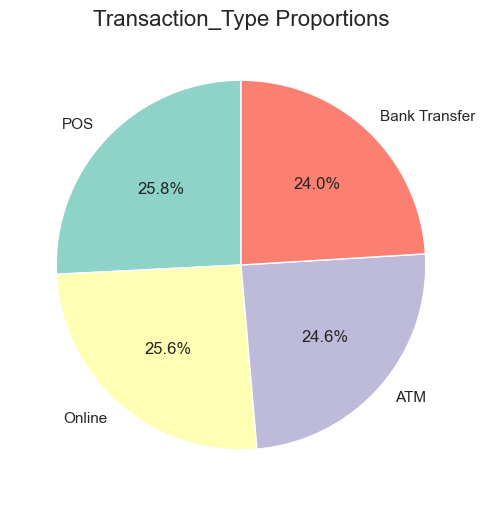

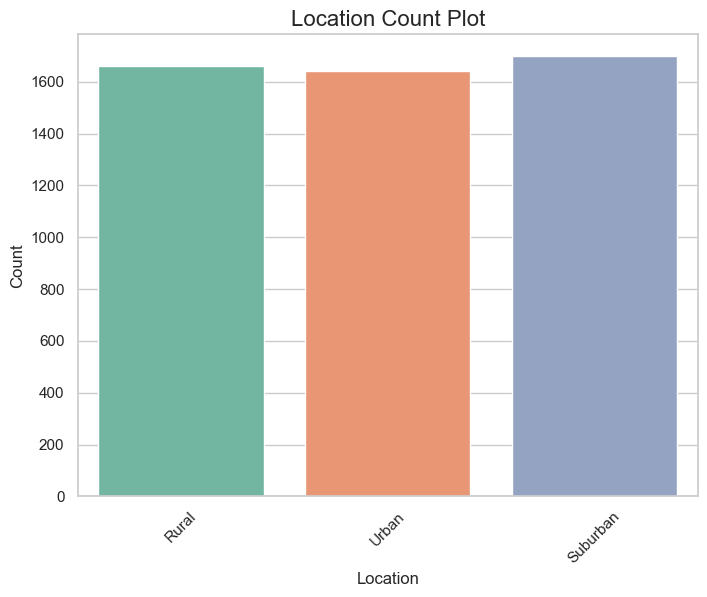

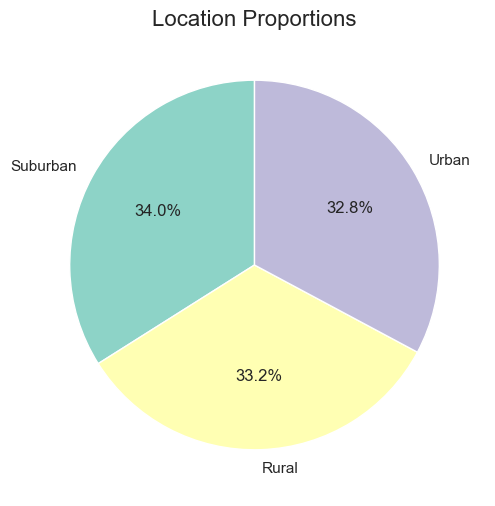

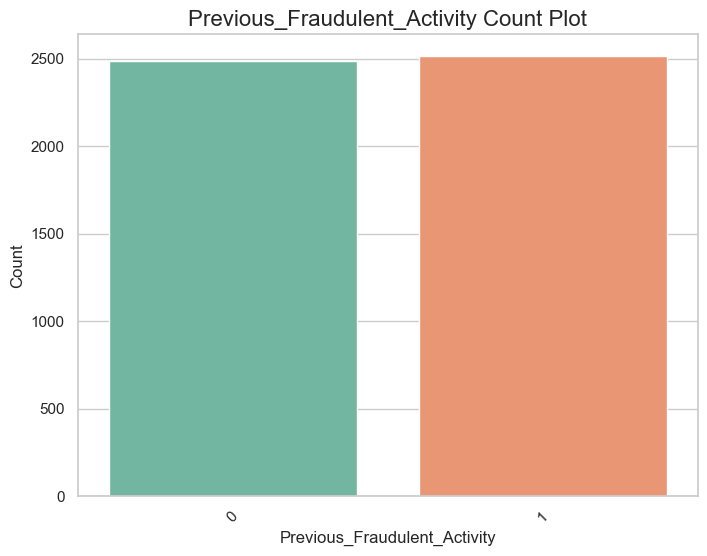

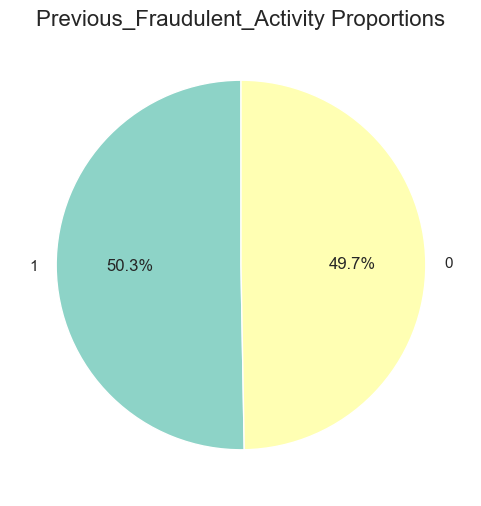

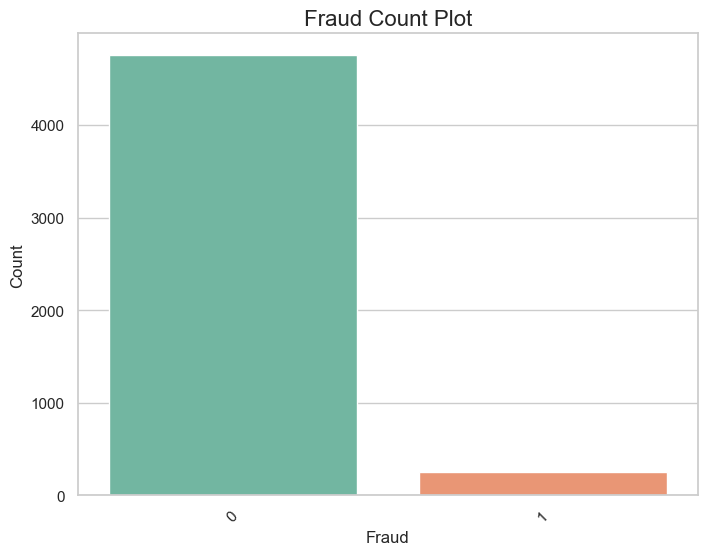

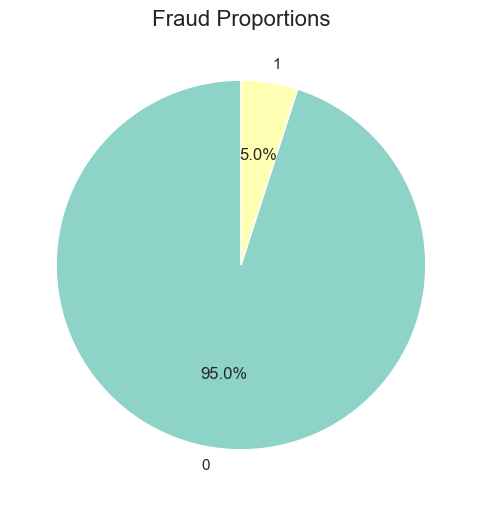

In [18]:
univariate_visualization(df, numerical_columns, categorical_columns)

## HEAT MAP

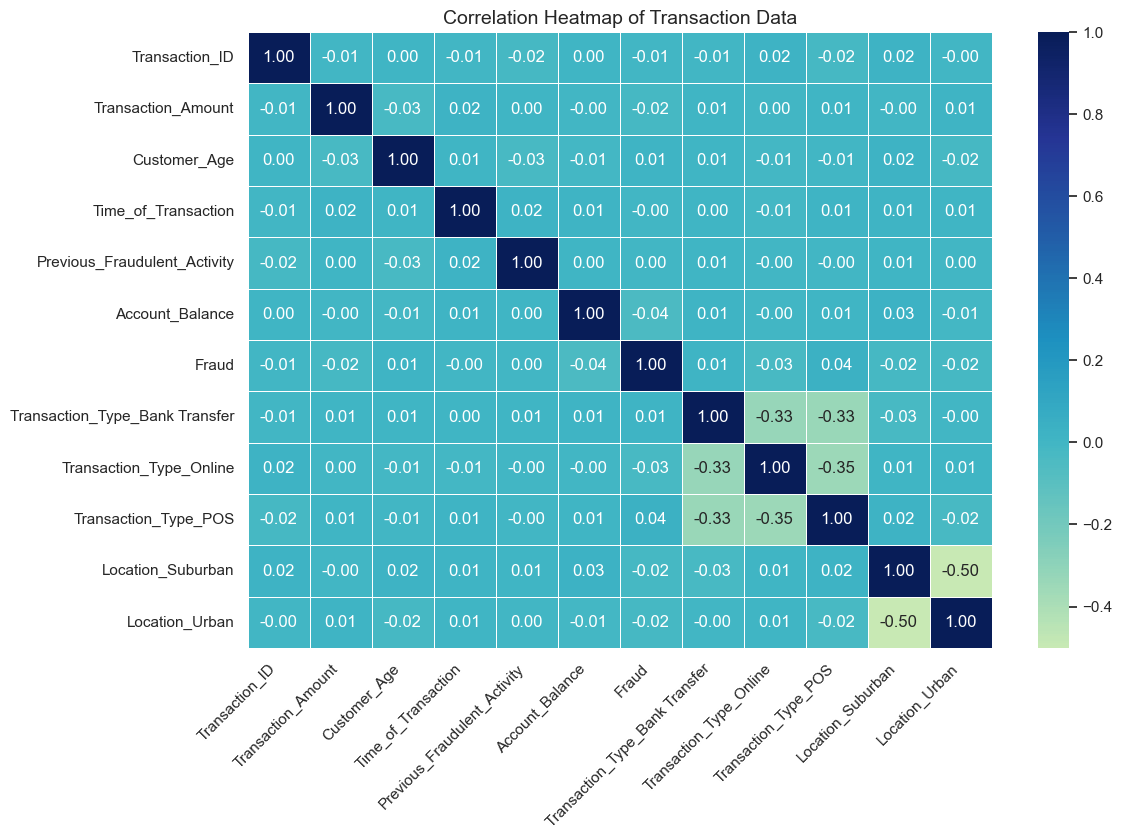

In [19]:
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Transaction_Type', 'Location'], drop_first=True)

# Compute correlation matrix
corr_matrix = df_encoded.corr()
# Plot heatmap with a better color scheme
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, center=0)

plt.title("Correlation Heatmap of Transaction Data", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.show()

## Z SCORE

In [20]:
df["zscore"]=scipy.stats.zscore(df["Transaction_Amount"])
df

,Transaction_ID,Transaction_Amount,Transaction_Type,Customer_Age,Time_of_Transaction,Location,Previous_Fraudulent_Activity,Account_Balance,Fraud,zscore
0,1.0,1875.83,ATM,69.0,23,Rural,1,47715.42,0,-0.422270
1,2.0,4753.82,Bank Transfer,21.0,14,Urban,1,29946.08,0,1.567249
2,3.0,3661.31,ATM,51.0,13,Suburban,1,37742.30,0,0.812010
3,4.0,2995.30,Bank Transfer,22.0,21,Urban,1,35719.05,0,0.351606
4,5.0,784.31,Bank Transfer,50.0,13,Suburban,0,43697.10,0,-1.176825
...,...,...,...,...,...,...,...,...,...,...
4995,4996.0,4487.50,Online,59.0,5,Urban,0,15365.36,0,1.383145
4996,4997.0,601.31,Bank Transfer,33.0,0,Suburban,1,15813.54,0,-1.303331
4997,4998.0,1642.57,Online,42.0,11,Suburban,0,43510.55,0,-0.583520
4998,4999.0,4079.65,Bank Transfer,77.0,12,Suburban,0,28004.22,0,1.101204


## TRAIN TEST SPLIT

In [21]:
x = df.drop(["Fraud","zscore",'Transaction_ID'], axis=1) 
y = df['Fraud'] 

In [22]:
x.columns

Index(['Transaction_Amount', 'Transaction_Type', 'Customer_Age',
       'Time_of_Transaction', 'Location', 'Previous_Fraudulent_Activity',
       'Account_Balance'],
      dtype='object')

In [23]:
x.isnull().sum()

Transaction_Amount              0
Transaction_Type                0
Customer_Age                    0
Time_of_Transaction             0
Location                        0
Previous_Fraudulent_Activity    0
Account_Balance                 0
dtype: int64

In [24]:
vif_df = pd.DataFrame()
vif_df["Features"] = x.columns
vif_df

,Features
0,Transaction_Amount
1,Transaction_Type
2,Customer_Age
3,Time_of_Transaction
4,Location
5,Previous_Fraudulent_Activity
6,Account_Balance


In [25]:
df.dtypes

Transaction_ID                  float64
Transaction_Amount              float64
Transaction_Type                 object
Customer_Age                    float64
Time_of_Transaction               int64
Location                         object
Previous_Fraudulent_Activity      int64
Account_Balance                 float64
Fraud                             int64
zscore                          float64
dtype: object

In [26]:
df['Transaction_Type'] = pd.to_numeric(df['Transaction_Type'], errors='coerce')
df['Location'] = pd.to_numeric(df['Location'], errors='coerce')

In [27]:
df['Transaction_ID'] = df['Transaction_ID'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                5000 non-null   int32  
 1   Transaction_Amount            5000 non-null   float64
 2   Transaction_Type              0 non-null      float64
 3   Customer_Age                  5000 non-null   float64
 4   Time_of_Transaction           5000 non-null   int64  
 5   Location                      0 non-null      float64
 6   Previous_Fraudulent_Activity  5000 non-null   int64  
 7   Account_Balance               5000 non-null   float64
 8   Fraud                         5000 non-null   int64  
 9   zscore                        5000 non-null   float64
dtypes: float64(6), int32(1), int64(3)
memory usage: 371.2 KB


## Assumption : No multicolinearity

In [29]:
label_encoder = LabelEncoder()
for col in x.select_dtypes(include=['object']).columns:
    x[col] = label_encoder.fit_transform(x[col])

In [30]:
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# Display VIF values
print(vif_data)

                        Feature       VIF
0            Transaction_Amount  3.408552
1              Transaction_Type  2.610938
2                  Customer_Age  5.273815
3           Time_of_Transaction  3.433492
4                      Location  2.333079
5  Previous_Fraudulent_Activity  1.916307
6               Account_Balance  3.460915


In [31]:

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

# Output the shapes of the split data
print("Training features shape:", xtrain.shape)
print("Testing features shape:", xtest.shape)
print("Training target shape:", ytrain.shape)
print("Testing target shape:", ytest.shape)

Training features shape: (4000, 7)
Testing features shape: (1000, 7)
Training target shape: (4000,)
Testing target shape: (1000,)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                5000 non-null   int32  
 1   Transaction_Amount            5000 non-null   float64
 2   Transaction_Type              0 non-null      float64
 3   Customer_Age                  5000 non-null   float64
 4   Time_of_Transaction           5000 non-null   int64  
 5   Location                      0 non-null      float64
 6   Previous_Fraudulent_Activity  5000 non-null   int64  
 7   Account_Balance               5000 non-null   float64
 8   Fraud                         5000 non-null   int64  
 9   zscore                        5000 non-null   float64
dtypes: float64(6), int32(1), int64(3)
memory usage: 371.2 KB


In [33]:
y.dtypes

dtype('int64')

# MODEL TRANING 1

### logistic regression

In [34]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [35]:
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression()

In [36]:
df = df.fillna(df.mean())  # Replace NaNs with column mean
df = df.replace([np.inf, -np.inf], np.nan).fillna(df.mean())  # Replace inf values


In [37]:
xtrain.head(5)

,Transaction_Amount,Transaction_Type,Customer_Age,Time_of_Transaction,Location,Previous_Fraudulent_Activity,Account_Balance
4050,4672.49,2,55.0,6,0,1,7135.57
3348,1572.56,0,40.0,4,2,0,47407.82
875,784.98,0,24.0,9,0,1,24818.92
2511,4417.91,0,61.0,0,0,0,34574.72
2795,2969.84,1,75.0,6,0,1,28781.33


In [38]:
ytrain_pred = log_reg_model.predict(xtrain)
ytrain_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## MODEL EVALUATION

In [39]:

print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)
conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)
multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)
clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.9505
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [ 198    0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[   0  198]
  [   0 3802]]

 [[3802    0]
  [ 198    0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3802
           1       0.00      0.00      0.00       198

    accuracy                           0.95      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.90      0.95      0.93      4000

------------------------------------------------------------


In [40]:
ytest_pred = log_reg_model.predict(xtest)


In [41]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)
multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.95
------------------------------------------------------------
Confusion Matrix : 
 [[950   0]
 [ 50   0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  0  50]
  [  0 950]]

 [[950   0]
  [ 50   0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       950
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.93      1000

------------------------------------------------------------


In [42]:
dt_clf = DecisionTreeClassifier()
dt_clf_model = dt_clf.fit(xtrain,ytrain)
dt_clf_model


DecisionTreeClassifier()

### MODEL EVALUATION

In [43]:
ytrain_pred = dt_clf_model.predict(xtrain)
ytest_pred = dt_clf_model.predict(xtest)
print("model evaluation for training data")
print("*"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("*"*60)
conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("*"*60)
multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("*"*60)
clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("*"*60)

model evaluation for training data
************************************************************
Accuracy Score :  1.0
************************************************************
Confusion Matrix : 
 [[3802    0]
 [   0  198]]
************************************************************
Multilabel Confusion Matrix : 
 [[[ 198    0]
  [   0 3802]]

 [[3802    0]
  [   0  198]]]
************************************************************
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3802
           1       1.00      1.00      1.00       198

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

************************************************************


In [44]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)
conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)
multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)
clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.896
------------------------------------------------------------
Confusion Matrix : 
 [[891  59]
 [ 45   5]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  5  45]
  [ 59 891]]

 [[891  59]
  [ 45   5]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       950
           1       0.08      0.10      0.09        50

    accuracy                           0.90      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.91      0.90      0.90      1000

------------------------------------------------------------


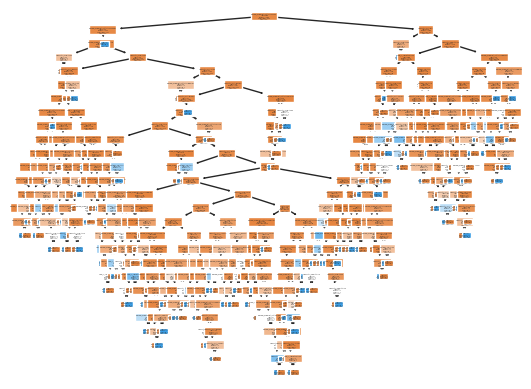

In [45]:
plot_tree(dt_clf_model, feature_names =  df.columns, class_names=["Yes","No"], filled=True)
plt.show()

## DECISION TREE WITH HYPERPARAMETER TUNNING

In [46]:
hyperparameters = {"criterion" : ["gini", "entropy", "log_loss"],
                   "max_depth" : np.arange(5,20),
                   "min_samples_split" : np.arange(2,10),
                   "min_samples_leaf" : np.arange(2,10)}
hyperparameters

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])}

In [47]:
rscv = RandomizedSearchCV(dt_clf_model, hyperparameters, cv = 5)
rscv = rscv.fit(xtrain, ytrain)
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8,
                       min_samples_split=8)

In [48]:
dt_clf = DecisionTreeClassifier(criterion='log_loss', max_depth=6, min_samples_leaf=7)

dt_clf_rscv_model = dt_clf.fit(xtrain, ytrain)
dt_clf_rscv_model

DecisionTreeClassifier(criterion='log_loss', max_depth=6, min_samples_leaf=7)

In [49]:
ytrain_pred = dt_clf_rscv_model.predict(xtrain)
ytest_pred = dt_clf_rscv_model.predict(xtest)
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)


model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.9505
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [ 198    0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[   0  198]
  [   0 3802]]

 [[3802    0]
  [ 198    0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3802
           1       0.00      0.00      0.00       198

    accuracy                           0.95      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.90      0.95      0.93      4000

------------------------------------------------------------


In [50]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.95
------------------------------------------------------------
Confusion Matrix : 
 [[950   0]
 [ 50   0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  0  50]
  [  0 950]]

 [[950   0]
  [ 50   0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       950
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.93      1000

------------------------------------------------------------


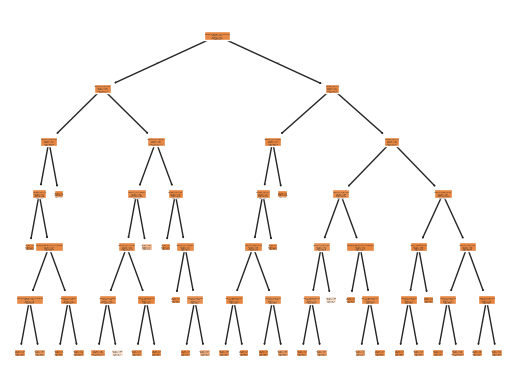

In [51]:
plot_tree(dt_clf_rscv_model, feature_names =  df.columns, class_names=["Yes","No"], filled=True)
plt.show()

## ALGORITHM 3 : RANDOM FOREST

### MODEL TRAINING

In [52]:
rf_clf = RandomForestClassifier()
rf_clf_model = rf_clf.fit(xtrain,ytrain)
rf_clf_model

RandomForestClassifier()

In [53]:
ytrain_pred = rf_clf_model.predict(xtrain)
ytest_pred = rf_clf_model.predict(xtest)

In [54]:
print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)


model evaluation for training data
------------------------------------------------------------
Accuracy Score :  1.0
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [   0  198]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[ 198    0]
  [   0 3802]]

 [[3802    0]
  [   0  198]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3802
           1       1.00      1.00      1.00       198

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

------------------------------------------------------------


In [55]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.95
------------------------------------------------------------
Confusion Matrix : 
 [[950   0]
 [ 50   0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  0  50]
  [  0 950]]

 [[950   0]
  [ 50   0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       950
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.93      1000

------------------------------------------------------------


## RANDOMFOREST WITH HYPERPARAMETER TUNNING

In [56]:
hyperparameters = {"criterion" : ["gini"],
                   "n_estimators": np.arange(5, 20),
                   "max_depth" : np.arange(5,20),
                   "min_samples_split" : np.arange(2,10),
                   "min_samples_leaf" : np.arange(2,10)}
hyperparameters

{'criterion': ['gini'],
 'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])}

In [57]:
rscv = RandomizedSearchCV(rf_clf_model, hyperparameters, cv = 5)
rscv = rscv.fit(xtrain, ytrain)
rscv.best_estimator_

RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=5,
                       n_estimators=7)

In [58]:
rf_clf = RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=7,
                       n_estimators=7)

rf_clf_rscv_model = rf_clf.fit(xtrain, ytrain)
rf_clf_rscv_model


RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=7,
                       n_estimators=7)

In [59]:
ytrain_pred = rf_clf_rscv_model.predict(xtrain)
ytest_pred = rf_clf_rscv_model.predict(xtest)

In [60]:

print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)



model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.9505
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [ 198    0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[   0  198]
  [   0 3802]]

 [[3802    0]
  [ 198    0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3802
           1       0.00      0.00      0.00       198

    accuracy                           0.95      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.90      0.95      0.93      4000

------------------------------------------------------------


In [61]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.95
------------------------------------------------------------
Confusion Matrix : 
 [[950   0]
 [ 50   0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  0  50]
  [  0 950]]

 [[950   0]
  [ 50   0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       950
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.93      1000

------------------------------------------------------------


### Algorithm 4 - Adaboost

In [62]:
adb_clf = AdaBoostClassifier()
adb_clf_model = adb_clf.fit(xtrain, ytrain)
adb_clf_model

AdaBoostClassifier()

In [63]:
ytrain_pred = adb_clf_model.predict(xtrain)
ytest_pred = adb_clf_model.predict(xtest)

In [64]:

print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)



model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.9505
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [ 198    0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[   0  198]
  [   0 3802]]

 [[3802    0]
  [ 198    0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3802
           1       0.00      0.00      0.00       198

    accuracy                           0.95      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.90      0.95      0.93      4000

------------------------------------------------------------


In [65]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.95
------------------------------------------------------------
Confusion Matrix : 
 [[950   0]
 [ 50   0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  0  50]
  [  0 950]]

 [[950   0]
  [ 50   0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       950
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.93      1000

------------------------------------------------------------


In [66]:
hyp = {"n_estimators" : np.arange(2,51), "learning_rate" : [0,0.1,0.001,0.1,1]}

rscv_adb = RandomizedSearchCV(adb_clf_model, hyp, cv = 5)
rscv_adb.fit(xtrain, ytrain).best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=12)

In [67]:
rscv_adb_clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=42)
rscv_adb_clf_model = rscv_adb_clf.fit(xtrain, ytrain)
rscv_adb_clf_model

AdaBoostClassifier(learning_rate=0.1, n_estimators=42)

In [68]:
ytrain_pred = rscv_adb_clf_model.predict(xtrain)
ytest_pred = rscv_adb_clf_model.predict(xtest)

In [69]:

print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)



model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.9505
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [ 198    0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[   0  198]
  [   0 3802]]

 [[3802    0]
  [ 198    0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3802
           1       0.00      0.00      0.00       198

    accuracy                           0.95      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.90      0.95      0.93      4000

------------------------------------------------------------


In [70]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.95
------------------------------------------------------------
Confusion Matrix : 
 [[950   0]
 [ 50   0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  0  50]
  [  0 950]]

 [[950   0]
  [ 50   0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       950
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.93      1000

------------------------------------------------------------


In [71]:
rscv_adb_clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=42)
rscv_adb_clf_model = rscv_adb_clf.fit(xtrain, ytrain)
rscv_adb_clf_model

AdaBoostClassifier(learning_rate=0.1, n_estimators=42)

## Algorithm 5 Gradient Boost 

In [72]:
gra_clf = GradientBoostingClassifier()
gra_clf_model = gra_clf.fit(xtrain, ytrain)
gra_clf_model

GradientBoostingClassifier()

In [73]:
ytrain_pred = gra_clf_model.predict(xtrain)
ytest_pred = gra_clf_model.predict(xtest)

In [74]:

print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)



model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.9555
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [ 178   20]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  20  178]
  [   0 3802]]

 [[3802    0]
  [ 178   20]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3802
           1       1.00      0.10      0.18       198

    accuracy                           0.96      4000
   macro avg       0.98      0.55      0.58      4000
weighted avg       0.96      0.96      0.94      4000

------------------------------------------------------------


In [75]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.947
------------------------------------------------------------
Confusion Matrix : 
 [[947   3]
 [ 50   0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  0  50]
  [  3 947]]

 [[947   3]
  [ 50   0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       950
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.92      1000

------------------------------------------------------------


### with Hyper Parameter Tunning

In [76]:
hyp = {"n_estimators" : np.arange(2,51), "learning_rate" : [0,0.1,0.001,0.1,1]}

rscv_adb = RandomizedSearchCV(gra_clf_model, hyp, cv = 5)
rscv_adb.fit(xtrain, ytrain).best_estimator_

GradientBoostingClassifier(learning_rate=0, n_estimators=48)

In [77]:
GradientBoostingClassifier(n_estimators=18)

GradientBoostingClassifier(n_estimators=18)

In [78]:
rscv_gra_clf = GradientBoostingClassifier(n_estimators=18)
rscv_gra_clf_model = rscv_gra_clf.fit(xtrain, ytrain)
rscv_gra_clf_model

GradientBoostingClassifier(n_estimators=18)

In [79]:
ytrain_pred = rscv_gra_clf_model.predict(xtrain)
ytest_pred = rscv_gra_clf_model.predict(xtest)

In [80]:

print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)



model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.95125
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [ 195    3]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[   3  195]
  [   0 3802]]

 [[3802    0]
  [ 195    3]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3802
           1       1.00      0.02      0.03       198

    accuracy                           0.95      4000
   macro avg       0.98      0.51      0.50      4000
weighted avg       0.95      0.95      0.93      4000

------------------------------------------------------------


In [81]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.95
------------------------------------------------------------
Confusion Matrix : 
 [[950   0]
 [ 50   0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  0  50]
  [  0 950]]

 [[950   0]
  [ 50   0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       950
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.93      1000

------------------------------------------------------------


## XGBClassifier

In [82]:
xg_boost_clf=XGBClassifier()
xg_boost_clf_model=xg_boost_clf.fit(xtrain, ytrain)
xg_boost_clf_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## With Hyper Parameter Tunning 

In [83]:
hyp = {"n_estimators" : np.arange(2,51), "learning_rate" : [0,0.1,0.001,0.1,1]}

rscv_xg_boost_clf = RandomizedSearchCV(xg_boost_clf_model, hyp, cv = 5)
rscv_xg_boost_clf.fit(xtrain, ytrain).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=49, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
rscv_xg_boost_clf=XGBClassifier(learning_rate=0.1,n_estimators=27)
rscv_xg_boost_clf_model=xg_boost_clf.fit(xtrain, ytrain)
rscv_xg_boost_clf_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [85]:
ytrain_pred = xg_boost_clf_model.predict(xtrain)
ytest_pred = xg_boost_clf_model.predict(xtest)

In [86]:

print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)



model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.99675
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [  13  185]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[ 185   13]
  [   0 3802]]

 [[3802    0]
  [  13  185]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3802
           1       1.00      0.93      0.97       198

    accuracy                           1.00      4000
   macro avg       1.00      0.97      0.98      4000
weighted avg       1.00      1.00      1.00      4000

------------------------------------------------------------


In [87]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.945
------------------------------------------------------------
Confusion Matrix : 
 [[945   5]
 [ 50   0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  0  50]
  [  5 945]]

 [[945   5]
  [ 50   0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       950
           1       0.00      0.00      0.00        50

    accuracy                           0.94      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.94      0.92      1000

------------------------------------------------------------


## KNN MODEL

In [88]:
knn_clf=KNeighborsClassifier(n_neighbors=2)
knn_clf_model=knn_clf.fit(xtrain, ytrain)
knn_clf_model

KNeighborsClassifier(n_neighbors=2)

In [89]:
ytrain_pred = knn_clf_model.predict(xtrain)
ytest_pred = knn_clf_model.predict(xtest)

## TRANING

In [90]:

print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)



model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.953
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [ 188   10]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  10  188]
  [   0 3802]]

 [[3802    0]
  [ 188   10]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3802
           1       1.00      0.05      0.10       198

    accuracy                           0.95      4000
   macro avg       0.98      0.53      0.54      4000
weighted avg       0.96      0.95      0.93      4000

------------------------------------------------------------


## TESTING

In [91]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.945
------------------------------------------------------------
Confusion Matrix : 
 [[945   5]
 [ 50   0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  0  50]
  [  5 945]]

 [[945   5]
  [ 50   0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       950
           1       0.00      0.00      0.00        50

    accuracy                           0.94      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.94      0.92      1000

------------------------------------------------------------


## KNN WITH HYPERPAREMETER TUNNING 

In [92]:
hyp = {
    "n_neighbors":np.arange(2,20),
    "p" : [1,2]
}

rscv_knn_clf_model = RandomizedSearchCV(knn_clf_model, hyp, cv = 6)
rscv_knn_clf_model.fit(xtrain,ytrain)
rscv_knn_clf_model.best_estimator_

KNeighborsClassifier(n_neighbors=11, p=1)

In [93]:
knn_clf_model=KNeighborsClassifier(n_neighbors=9, p=1)
rscv_knn_clf_model=knn_clf_model.fit(xtrain, ytrain)
ytrain_pred = rscv_knn_clf_model.predict(xtrain)
ytest_pred = rscv_knn_clf_model.predict(xtest)

### TRANING 

In [94]:

print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytrain, ytrain_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)



model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.9505
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [ 198    0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[   0  198]
  [   0 3802]]

 [[3802    0]
  [ 198    0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3802
           1       0.00      0.00      0.00       198

    accuracy                           0.95      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.90      0.95      0.93      4000

------------------------------------------------------------


### TESTING

In [95]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.95
------------------------------------------------------------
Confusion Matrix : 
 [[950   0]
 [ 50   0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  0  50]
  [  0 950]]

 [[950   0]
  [ 50   0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       950
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.93      1000

------------------------------------------------------------


### SVM

In [96]:
svc = SVC()
svm_model = svc.fit(xtrain, ytrain)
svm_model

SVC()

In [97]:
ytrain_pred = svm_model.predict(xtrain)
ytest_pred = svm_model.predict(xtest)

In [98]:

print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)


print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.9505
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [ 198    0]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3802
           1       0.00      0.00      0.00       198

    accuracy                           0.95      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.90      0.95      0.93      4000

------------------------------------------------------------
model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.95
------------------------------------------------------------
Confusion Matrix : 
 [[950   0]
 [ 50   0]]
------------------------------------------------------------
Classificat

In [99]:

print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)


print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.9505
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [ 198    0]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3802
           1       0.00      0.00      0.00       198

    accuracy                           0.95      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.90      0.95      0.93      4000

------------------------------------------------------------
model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.95
------------------------------------------------------------
Confusion Matrix : 
 [[950   0]
 [ 50   0]]
------------------------------------------------------------
Classificat

In [100]:
nb_clf=BernoulliNB()
nb_clf

BernoulliNB()

In [101]:
nb_clf=BernoulliNB()
nb_clf_model=nb_clf.fit(xtrain, ytrain)
nb_clf_model

BernoulliNB()

In [102]:
ytrain_pred = nb_clf_model.predict(xtrain)
ytest_pred = nb_clf_model.predict(xtest)

## testing 

In [103]:

print("model evaluation for training data")
print("-"*60)
acc = accuracy_score(ytrain, ytrain_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytrain, ytrain_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)


clf_report = classification_report(ytrain, ytrain_pred)
print("Classification Report : \n", clf_report)
print("-"*60)


print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for training data
------------------------------------------------------------
Accuracy Score :  0.9505
------------------------------------------------------------
Confusion Matrix : 
 [[3802    0]
 [ 198    0]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3802
           1       0.00      0.00      0.00       198

    accuracy                           0.95      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.90      0.95      0.93      4000

------------------------------------------------------------
model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.95
------------------------------------------------------------
Confusion Matrix : 
 [[950   0]
 [ 50   0]]
------------------------------------------------------------
Classificat

## tranning

In [104]:
print("model evaluation for Testing data")
print("-"*60)
acc = accuracy_score(ytest, ytest_pred)
print("Accuracy Score : ", acc)
print("-"*60)

conf_mat = confusion_matrix(ytest, ytest_pred)
print("Confusion Matrix : \n",conf_mat)
print("-"*60)

multi_conf_mat = multilabel_confusion_matrix(ytest, ytest_pred)
print("Multilabel Confusion Matrix : \n",multi_conf_mat)
print("-"*60)


clf_report = classification_report(ytest, ytest_pred)
print("Classification Report : \n", clf_report)
print("-"*60)

model evaluation for Testing data
------------------------------------------------------------
Accuracy Score :  0.95
------------------------------------------------------------
Confusion Matrix : 
 [[950   0]
 [ 50   0]]
------------------------------------------------------------
Multilabel Confusion Matrix : 
 [[[  0  50]
  [  0 950]]

 [[950   0]
  [ 50   0]]]
------------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       950
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.93      1000

------------------------------------------------------------


## SAVE BEST MODEL IN PICKLE FILE

In [105]:
import pickle   


In [106]:
with open("fraudulent_transactions_Model.pkl","wb") as f:
    pickle.dump(dt_clf_model,f)

In [107]:
test_data = xtrain.head(1)
test_data

,Transaction_Amount,Transaction_Type,Customer_Age,Time_of_Transaction,Location,Previous_Fraudulent_Activity,Account_Balance
4050,4672.49,2,55.0,6,0,1,7135.57


In [108]:
with open("fraudulent_transactions_Model.pkl","rb") as f:
    Final_Model = pickle.load(f)

In [109]:
Final_Model.predict(test_data)[0]

0

In [110]:
df.columns

Index(['Transaction_ID', 'Transaction_Amount', 'Transaction_Type',
       'Customer_Age', 'Time_of_Transaction', 'Location',
       'Previous_Fraudulent_Activity', 'Account_Balance', 'Fraud', 'zscore'],
      dtype='object')

In [111]:
def MyFunction(Transaction_ID,Transaction_Amount,Transaction_Type,Customer_Age, Time_of_Transaction,
               Location,Previous_Fraudulent_Activity,Account_Balance,Fraud):
    new_data = pd.DataFrame({'Transaction_Amount':[Transaction_Amount], 
                             'Transaction_Type':[Transaction_Type],
                             'Customer_Age':[Customer_Age],
                             'Time_of_Transaction':[Time_of_Transaction],
                             'Location':[Location],
                             'Previous_Fraudulent_Activity':[Previous_Fraudulent_Activity],
                             'Account_Balance':[Account_Balance],
                             'Fraud':[Fraud]
                              
                             })
                            
    print("New Data\n",new_data)

    with open("fraudulent_transactions_Model.pkl","rb") as f:
        Final_Model = pickle.load(f)
    
    if Final_Model.predict(test_data)[0] == 0:
        print("Predicted Fraud Probability : Yes")

    else :
        print("Predicted Fraud Probability : No")

In [112]:
MyFunction(100,55,66,998,66,33,77,4465,5566)

New Data
    Transaction_Amount  Transaction_Type  Customer_Age  Time_of_Transaction  \
0                  55                66           998                   66   

   Location  Previous_Fraudulent_Activity  Account_Balance  Fraud  
0        33                            77             4465   5566  
Predicted Fraud Probability : Yes


In [113]:
MyFunction(4995,4996,4487.50,2,59,2,0,15365.36,0)

New Data
    Transaction_Amount  Transaction_Type  Customer_Age  Time_of_Transaction  \
0                4996            4487.5             2                   59   

   Location  Previous_Fraudulent_Activity  Account_Balance  Fraud  
0         2                             0         15365.36      0  
Predicted Fraud Probability : Yes


In [121]:
%%writefile ABHAY_fraudulent_transactions_predaction_app.py
import streamlit as st
import os
import joblib
import pandas as pd
import numpy as np

# Load the trained model
@st.cache_resource
def load_model():
    model_path = os.path.join(os.getcwd(), "fraudulent_transactions_Model.pkl")
    if not os.path.exists(model_path):
        st.error(f"Model file not found: {model_path}")
        return None
    return joblib.load("fraudulent_transactions_Model.pkl")  # Ensure your model file is named correctly

model = load_model()

st.title("💳 Fraudulent Transactions Prediction App")

# Get feature names from the model
expected_features = model.feature_names_in_  # Retrieves the exact feature order

# Collect user input
def user_input():
    st.sidebar.header("Enter Transaction Details")
    transaction_amount = st.sidebar.number_input("Transaction Amount", min_value=0.0, max_value=10000.0, value=500.0)
    transaction_type = st.sidebar.selectbox("Transaction Type", ["Online", "In-Person", "ATM Withdrawal"])
    account_balance = st.sidebar.number_input("Account Balance", min_value=0.0, max_value=100000.0, value=1000.0)
    customer_age = st.sidebar.number_input("Customer Age", min_value=18, max_value=100, value=30)
    location = st.sidebar.selectbox("Transaction Location", ["Urban", "Suburban", "Rural"])
    previous_fraud = st.sidebar.selectbox("Previous Fraudulent Activity", ["Yes", "No"])
    time_of_transaction = st.sidebar.slider("Time of Transaction (Hour)", 0, 23, 12)
    
    # Encode categorical variables
    transaction_type_encoded = 1 if transaction_type == "Online" else (2 if transaction_type == "In-Person" else 3)
    location_encoded = 1 if location == "Urban" else (2 if location == "Suburban" else 3)
    previous_fraud_encoded = 1 if previous_fraud == "Yes" else 0
    
    data = pd.DataFrame([[transaction_amount, transaction_type_encoded, account_balance, customer_age, location_encoded, previous_fraud_encoded, time_of_transaction]], 
                         columns=["Transaction_Amount", "Transaction_Type", "Account_Balance", "Customer_Age", "Location", "Previous_Fraudulent_Activity", "Time_of_Transaction"])
    
    # Reorder input data to match model training order
    data = data[expected_features]
    return data

input_data = user_input()

if st.button("Predict"):  # Run prediction when button is clicked
    prediction = model.predict(input_data)
    result = "Fraudulent" if prediction[0] == 1 else "Not Fraudulent"
    st.write(f"### Prediction: {result}")


Overwriting ABHAY_fraudulent_transactions_predaction_app.py
